## MachineLearning_INSULA

In [15]:
#loading
todo = "DG"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DataDir = "C:/Users/mathieu.yeche/OneDrive - ICM/Thèse - Scientifique/Insula_Odeurs/"
OutputDir = "C:/Users/mathieu.yeche/OneDrive - ICM/Thèse - Scientifique/Insula_Odeurs/Figures/"

if todo == "DG" :
    InsulaDG = DataDir + "Comp patients controls_pr_analyse_Juillet2023.xlsx"
    Data = pd.read_excel(InsulaDG, sheet_name='Patients loc tumeur DG')
Data.head()

,Id,Groupes,odeurs,Intensite,Familiarite,Irritabilite,Agreable,Rafraichissement,Sensualite,Relaxation,Désagréable,PlaisirSensoriel
0,AGULu,G,Menthe,100.000000,85.937500,8.258929,82.142857,100.000000,45.758929,86.830357,8.482143,74.330357
1,AGULu,G,Tiare,70.758929,35.937500,19.642857,13.616071,68.303571,11.160714,10.937500,63.169643,12.946429
2,AGULu,G,Civette,91.517857,14.062500,71.428571,12.500000,21.428571,12.723214,10.937500,94.196429,11.607143
3,AGULu,G,Lilas,58.705357,95.089286,14.955357,94.419643,88.392857,93.526786,94.419643,11.160714,10.491071
4,AGULu,G,Neutre,23.883929,45.535714,10.937500,52.901786,52.901786,12.723214,21.205357,21.875000,11.607143


Preprocessing

In [16]:
if todo == "DG" :
    Data.loc[Data['Groupes'].isin(['G']) , 'Groupes'] = 1
    Data.loc[Data['Groupes'].isin(['D']) , 'Groupes'] = 0
    print(Data.head())



      Id Groupes   odeurs   Intensite  Familiarite  Irritabilite   Agreable  \
0  AGULu       1   Menthe  100.000000    85.937500      8.258929  82.142857   
1  AGULu       1    Tiare   70.758929    35.937500     19.642857  13.616071   
2  AGULu       1  Civette   91.517857    14.062500     71.428571  12.500000   
3  AGULu       1    Lilas   58.705357    95.089286     14.955357  94.419643   
4  AGULu       1   Neutre   23.883929    45.535714     10.937500  52.901786   

   Rafraichissement  Sensualite  Relaxation  Désagréable  PlaisirSensoriel  
0        100.000000   45.758929   86.830357     8.482143         74.330357  
1         68.303571   11.160714   10.937500    63.169643         12.946429  
2         21.428571   12.723214   10.937500    94.196429         11.607143  
3         88.392857   93.526786   94.419643    11.160714         10.491071  
4         52.901786   12.723214   21.205357    21.875000         11.607143  


Classification tree

In [36]:
X   = Data.drop('Groupes', axis = 1)
X   = X.drop('Id', axis = 1)
X   = X.drop('odeurs', axis = 1)
y   = Data['Groupes']

print(X.columns)
print(X.head())
print(y.head())

print(type(y))  # should be a Pandas Series or NumPy array
print(np.unique(y))  # should return an array of discrete values
y = np.array(y)  # convert y to a NumPy array
print(type(y))  # should be a NumPy array
print(y.shape)  # should be one-dimensional with shape (n_samples,)
y = pd.to_numeric(y, errors='coerce')
print(np.isnan(y).any())  # should return an array of discrete values

Index(['Intensite', 'Familiarite', 'Irritabilite', 'Agreable',
       'Rafraichissement', 'Sensualite', 'Relaxation', 'Désagréable',
       'PlaisirSensoriel'],
      dtype='object')
    Intensite  Familiarite  Irritabilite   Agreable  Rafraichissement  \
0  100.000000    85.937500      8.258929  82.142857        100.000000   
1   70.758929    35.937500     19.642857  13.616071         68.303571   
2   91.517857    14.062500     71.428571  12.500000         21.428571   
3   58.705357    95.089286     14.955357  94.419643         88.392857   
4   23.883929    45.535714     10.937500  52.901786         52.901786   

   Sensualite  Relaxation  Désagréable  PlaisirSensoriel  
0   45.758929   86.830357     8.482143         74.330357  
1   11.160714   10.937500    63.169643         12.946429  
2   12.723214   10.937500    94.196429         11.607143  
3   93.526786   94.419643    11.160714         10.491071  
4   12.723214   21.205357    21.875000         11.607143  
0    1
1    1
2    1
3  

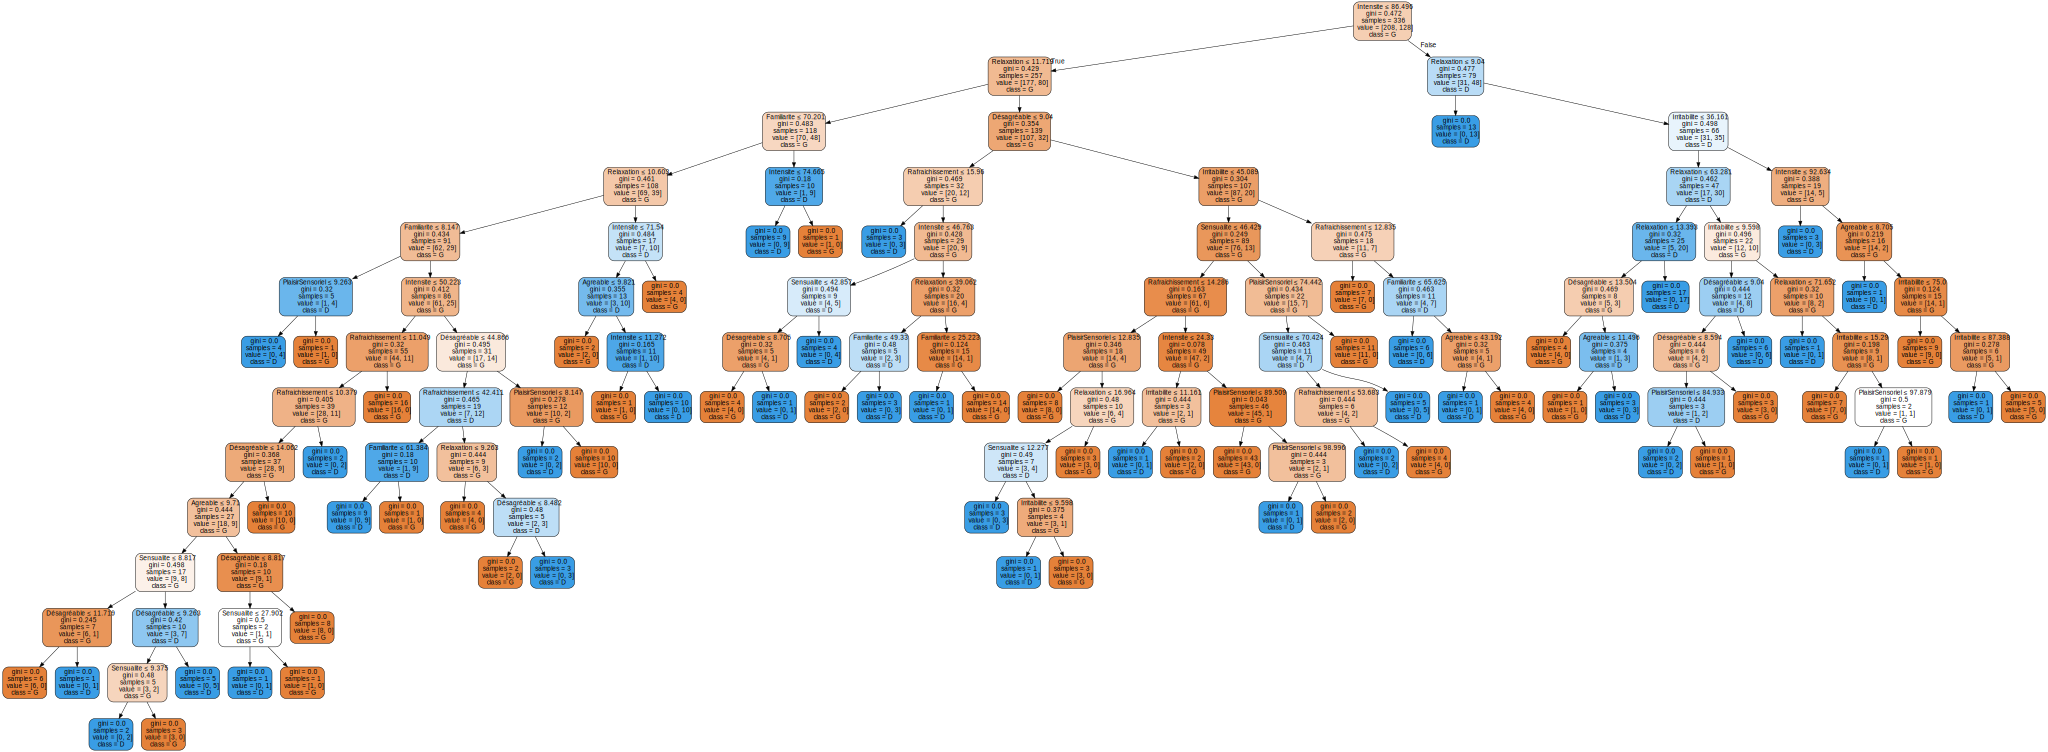

In [37]:
feature_names = X.columns
target_names  = ['G','D']

import graphviz 
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                      class_names=target_names,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Neural Network

In [ ]:
from sklearn.model_selection import train_test_split

X   = MY_APA.drop('FOG', axis = 1)
y   = MY_APA['FOG']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
        hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(Xtrain, ytrain)

c:\Users\mathieu.yeche\Anaconda3\envs\GTP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
ypred = clf.predict(Xtest)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.7685009487666035


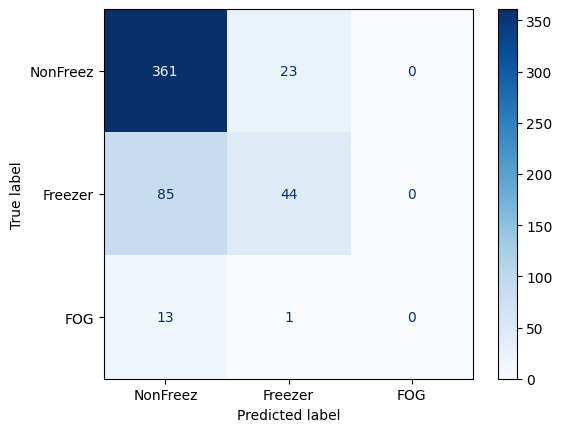

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(ytest, ypred)

disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        Xtest,
        ytest,
        display_labels=target_names,
        cmap=plt.cm.Blues,
        normalize=None,
    )

Same, only for fog 0/1

In [ ]:
MY_APA_red = 0
MY_APA_red = MY_APA.copy()
MY_APA_red.loc[MY_APA_red['FOG'].isin([1, 2]), 'FOG'] = 0
MY_APA_red.loc[MY_APA_red['FOG'].isin([3]),'FOG'] = 1
MY_APA_red.head()

X   = MY_APA_red.drop('FOG', axis = 1)
y   = MY_APA_red['FOG']

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
        hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)

c:\Users\mathieu.yeche\Anaconda3\envs\GTP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:

print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.9582542694497154


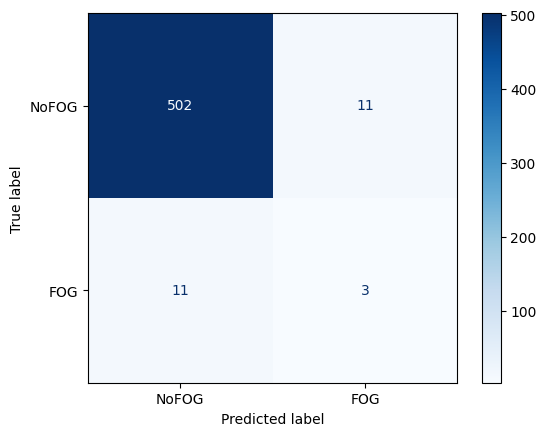

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        Xtest,
        ytest,
        display_labels=['NoFOG','FOG'],
        cmap=plt.cm.Blues,
        normalize=None,
    )

In [ ]:
print(sum(MY_APA['FOG'] == 1))

1909
